<a href="https://colab.research.google.com/github/ivandorte/python_gis/blob/main/08_rtree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
! pip install rtree

In [100]:
import numpy as np
import rtree
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [101]:
# Number of points to generate
num_points = 10000

# Generate some random points
points = [Point(pt[0], pt[1]) for pt in np.random.uniform(-8, 8, (num_points, 2))]

In [102]:
cx, cy = 0, 0
radius = 4
circle = Point(cx, cy).buffer(radius)

In [103]:
# Create an empty spatial index object
spidx = rtree.index.Index()

In [104]:
# Populate the spatial index with points bounding boxes
for pt_id, point in enumerate(points):
    spidx.insert(pt_id, point.bounds)

In [105]:
# Get indexes that intersects the circle bounding box
intersecting_ids = [i for i in spidx.intersection(circle.bounds)]

In [106]:
# Get the points that intersects the circle bounding box
intersecting_points = np.array([(points[i].x, points[i].y)  for i in intersecting_ids])

# Get the points that don't intersects the circle bounding box
not_intersecting = np.array([(pt.x, pt.y) for i, pt in enumerate(points) if i not in intersecting_ids])

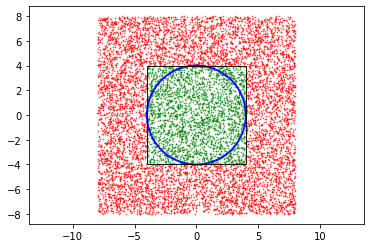

In [107]:
# Creates a figure and one subplot
fig, ax = plt.subplots()

# Plot the circle
ax.add_patch(plt.Circle((cx,cy), radius, color='b', alpha=0.9, ls='-', ec='b', lw=2, fill=False))

# Plot the bounding box (Blue)
ax.add_patch(plt.Rectangle((circle.bounds[0], circle.bounds[1]), abs(circle.bounds[0]) + circle.bounds[2], abs(circle.bounds[0]) + circle.bounds[3],
                           ec='k', lw=1, fill=False, alpha=0.9))

# Plot the points that intersects the bounding box (Green)
ax.scatter(intersecting_points[:,0], intersecting_points[:,1], c='green', s=0.5, alpha=0.6)

# Plot the points that don't intersects the bounding box (Red)
ax.scatter(not_intersecting[:,0], not_intersecting[:,1], c='red', s=0.5, alpha=0.6)

# Show the plot
ax.set_aspect('equal', adjustable='datalim')
plt.show()

In [108]:
# Get the points that are inside the circle
points_inside = np.array([(points[i].x, points[i].y)  for i in intersecting_ids if points[i].within(circle)])

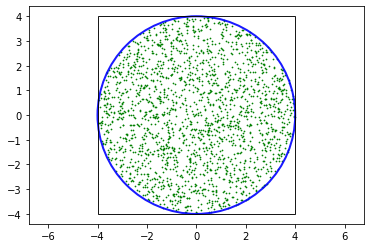

In [109]:
# Creates a figure and one subplot
fig, ax = plt.subplots()

# Plot the circle
ax.add_patch(plt.Circle((cx,cy), radius, color='b', alpha=0.9, ls='-', ec='b', lw=2, fill=False))

# Plot the bounding box (Blue)
ax.add_patch(plt.Rectangle((circle.bounds[0], circle.bounds[1]), abs(circle.bounds[0]) + circle.bounds[2], abs(circle.bounds[0]) + circle.bounds[3],
                           ec='k', lw=1, fill=False, alpha=0.9))

# Plot the points that are inside the circle
ax.scatter(points_inside[:,0], points_inside[:,1], c='green', s=0.5)

# Show the plot
ax.set_aspect('equal', adjustable='datalim')
plt.show()